In [1]:
import ast
import pandas as pd
import seaborn as sns
from datasets import load_dataset
import matplotlib.pyplot as plt  

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

FILTER FOR US DATA ANALYST ROLES

In [ ]:
df_DA_US=df[(df['job_country']=='United States')&(df['job_title_short']=='Data Analyst')]


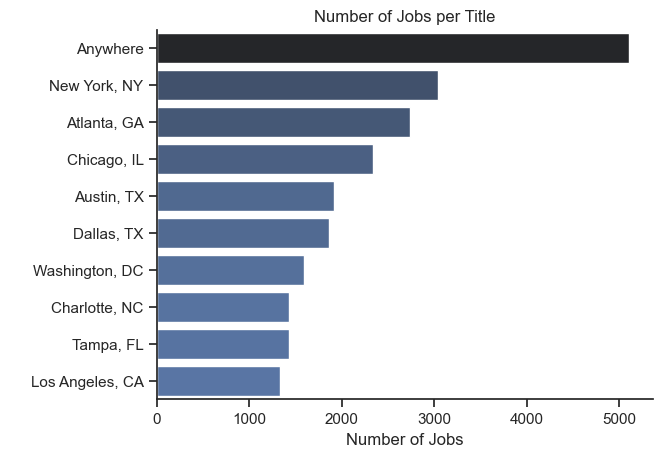

In [17]:
df_plot=df_DA_US['job_location'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot,x='count',y='job_location',hue='count',palette="dark:b_r",legend=False)
sns.despine()
plt.title("Number of Jobs per Title")
plt.xlabel("Number of Jobs")
plt.ylabel(' ')
plt.show()

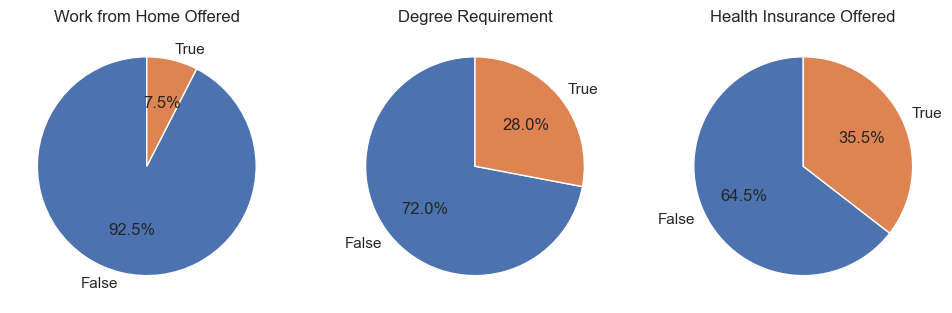

In [18]:
dict_column = {
    'job_work_from_home': 'Work from Home Offered',
    'job_no_degree_mention': 'Degree Requirement',
    'job_health_insurance': 'Health Insurance Offered'
}

fig, ax = plt.subplots(1, 3)
fig.set_size_inches((12, 5))

for i, (column, title) in enumerate(dict_column.items()):
    ax[i].pie(df_DA_US[column].value_counts(), labels=['False', 'True'], autopct='%1.1f%%', startangle=90)
    ax[i].set_title(title)

# plt.suptitle('Benefit Analysis of Data Jobs', fontsize=16)
plt.show()

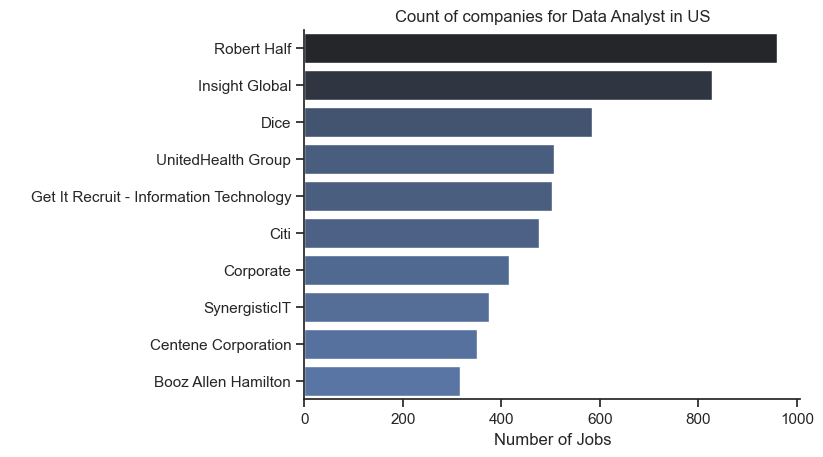

In [20]:
df_plot=df_DA_US['company_name'].value_counts().head(10).to_frame()
sns.set_theme(style="ticks")
sns.barplot(data=df_plot,x='count',y='company_name',hue='count',palette="dark:b_r",legend=False)
sns.despine()
plt.title("Count of companies for Data Analyst in US")
plt.xlabel("Number of Jobs")
plt.ylabel(' ')
plt.show()